# Pandas

In [1]:
import numpy as np
import pandas as pd

## Object Creation

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,1.064043,-0.080050,1.335688,-0.422429
2013-01-02,1.150139,1.159086,2.049333,-0.669044
2013-01-03,-0.616291,-0.434387,-0.012947,0.717528
2013-01-04,-0.258321,0.104785,0.124839,0.992872
2013-01-05,-1.375663,-0.177417,0.498680,-1.539356
2013-01-06,1.488716,0.744553,1.013979,1.126882


In [8]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.consolidate
df2.applymap
df2.D

SyntaxError: invalid syntax (<ipython-input-11-a08075bfc984>, line 1)

## Viewing Data

In [12]:
df.head()

,A,B,C,D
2013-01-01,1.064043,-0.080050,1.335688,-0.422429
2013-01-02,1.150139,1.159086,2.049333,-0.669044
2013-01-03,-0.616291,-0.434387,-0.012947,0.717528
2013-01-04,-0.258321,0.104785,0.124839,0.992872
2013-01-05,-1.375663,-0.177417,0.498680,-1.539356


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.258321,0.104785,0.124839,0.992872
2013-01-05,-1.375663,-0.177417,0.498680,-1.539356
2013-01-06,1.488716,0.744553,1.013979,1.126882


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.to_numpy()

array([[ 1.06404314, -0.08004995,  1.33568788, -0.42242854],
       [ 1.15013906,  1.15908648,  2.04933315, -0.66904445],
       [-0.61629117, -0.43438653, -0.01294722,  0.71752842],
       [-0.25832069,  0.10478458,  0.12483891,  0.99287203],
       [-1.37566309, -0.1774173 ,  0.4986802 , -1.53935613],
       [ 1.48871551,  0.74455318,  1.01397871,  1.12688223]])

In [17]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.242104,0.219428,0.834929,0.034409
std,1.154001,0.607701,0.786611,1.073227
min,-1.375663,-0.434387,-0.012947,-1.539356
25%,-0.526799,-0.153075,0.218299,-0.607390
50%,0.402861,0.012367,0.756329,0.147550
75%,1.128615,0.584611,1.255261,0.924036
max,1.488716,1.159086,2.049333,1.126882


In [19]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.064043,1.150139,-0.616291,-0.258321,-1.375663,1.488716
B,-0.080050,1.159086,-0.434387,0.104785,-0.177417,0.744553
C,1.335688,2.049333,-0.012947,0.124839,0.498680,1.013979
D,-0.422429,-0.669044,0.717528,0.992872,-1.539356,1.126882


In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.422429,1.335688,-0.080050,1.064043
2013-01-02,-0.669044,2.049333,1.159086,1.150139
2013-01-03,0.717528,-0.012947,-0.434387,-0.616291
2013-01-04,0.992872,0.124839,0.104785,-0.258321
2013-01-05,-1.539356,0.498680,-0.177417,-1.375663
2013-01-06,1.126882,1.013979,0.744553,1.488716


In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-0.616291,-0.434387,-0.012947,0.717528
2013-01-05,-1.375663,-0.177417,0.498680,-1.539356
2013-01-01,1.064043,-0.080050,1.335688,-0.422429
2013-01-04,-0.258321,0.104785,0.124839,0.992872
2013-01-06,1.488716,0.744553,1.013979,1.126882
2013-01-02,1.150139,1.159086,2.049333,-0.669044


## Selection

In [22]:
df['A']

2013-01-01    1.064043
2013-01-02    1.150139
2013-01-03   -0.616291
2013-01-04   -0.258321
2013-01-05   -1.375663
2013-01-06    1.488716
Freq: D, Name: A, dtype: float64

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,1.064043,-0.080050,1.335688,-0.422429
2013-01-02,1.150139,1.159086,2.049333,-0.669044
2013-01-03,-0.616291,-0.434387,-0.012947,0.717528


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.150139,1.159086,2.049333,-0.669044
2013-01-03,-0.616291,-0.434387,-0.012947,0.717528
2013-01-04,-0.258321,0.104785,0.124839,0.992872


In [25]:
df.loc[dates[0]]

A    1.064043
B   -0.080050
C    1.335688
D   -0.422429
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,1.064043,-0.080050
2013-01-02,1.150139,1.159086
2013-01-03,-0.616291,-0.434387
2013-01-04,-0.258321,0.104785
2013-01-05,-1.375663,-0.177417
2013-01-06,1.488716,0.744553


In [27]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,1.150139,1.159086
2013-01-03,-0.616291,-0.434387
2013-01-04,-0.258321,0.104785


In [28]:
df.loc['20130102', ['A', 'B']]

A    1.150139
B    1.159086
Name: 2013-01-02 00:00:00, dtype: float64

In [29]:
df.loc[dates[0], 'A']

1.0640431373562862

In [30]:
df.at[dates[0], 'A']

1.0640431373562862

In [31]:
df.iloc[3]

A   -0.258321
B    0.104785
C    0.124839
D    0.992872
Name: 2013-01-04 00:00:00, dtype: float64

In [32]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.258321,0.104785
2013-01-05,-1.375663,-0.177417


In [33]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.150139,2.049333
2013-01-03,-0.616291,-0.012947
2013-01-05,-1.375663,0.498680


In [34]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.150139,1.159086,2.049333,-0.669044
2013-01-03,-0.616291,-0.434387,-0.012947,0.717528


In [35]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.080050,1.335688
2013-01-02,1.159086,2.049333
2013-01-03,-0.434387,-0.012947
2013-01-04,0.104785,0.124839
2013-01-05,-0.177417,0.498680
2013-01-06,0.744553,1.013979


In [36]:
df.iloc[1, 1]

1.159086478489352

In [37]:
df.iat[1, 1]

1.159086478489352

In [38]:
df[df['A'] > 0]

,A,B,C,D
2013-01-01,1.064043,-0.080050,1.335688,-0.422429
2013-01-02,1.150139,1.159086,2.049333,-0.669044
2013-01-06,1.488716,0.744553,1.013979,1.126882


In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,1.064043,NaN,1.335688,NaN
2013-01-02,1.150139,1.159086,2.049333,NaN
2013-01-03,NaN,NaN,NaN,0.717528
2013-01-04,NaN,0.104785,0.124839,0.992872
2013-01-05,NaN,NaN,0.498680,NaN
2013-01-06,1.488716,0.744553,1.013979,1.126882


In [40]:
df2 = df.copy()

In [41]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [42]:
df2

,A,B,C,D,E
2013-01-01,1.064043,-0.080050,1.335688,-0.422429,one
2013-01-02,1.150139,1.159086,2.049333,-0.669044,one
2013-01-03,-0.616291,-0.434387,-0.012947,0.717528,two
2013-01-04,-0.258321,0.104785,0.124839,0.992872,three
2013-01-05,-1.375663,-0.177417,0.498680,-1.539356,four
2013-01-06,1.488716,0.744553,1.013979,1.126882,three


In [43]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.616291,-0.434387,-0.012947,0.717528,two
2013-01-05,-1.375663,-0.177417,0.498680,-1.539356,four


In [44]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1

In [47]:
df.at[dates[0], 'A'] = 0

In [48]:
df.iat[0, 1] = 0

In [49]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.335688,5,NaN
2013-01-02,1.150139,1.159086,2.049333,5,1.0
2013-01-03,-0.616291,-0.434387,-0.012947,5,2.0
2013-01-04,-0.258321,0.104785,0.124839,5,3.0
2013-01-05,-1.375663,-0.177417,0.498680,5,4.0
2013-01-06,1.488716,0.744553,1.013979,5,5.0


In [51]:
df2 = df.copy()

In [52]:
df2[df2 > 0] = -df2

In [53]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.335688,-5,NaN
2013-01-02,-1.150139,-1.159086,-2.049333,-5,-1.0
2013-01-03,-0.616291,-0.434387,-0.012947,-5,-2.0
2013-01-04,-0.258321,-0.104785,-0.124839,-5,-3.0
2013-01-05,-1.375663,-0.177417,-0.498680,-5,-4.0
2013-01-06,-1.488716,-0.744553,-1.013979,-5,-5.0


## Missing Data

In [54]:
 df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [55]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [56]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.335688,5,NaN,1.0
2013-01-02,1.150139,1.159086,2.049333,5,1.0,1.0
2013-01-03,-0.616291,-0.434387,-0.012947,5,2.0,NaN
2013-01-04,-0.258321,0.104785,0.124839,5,3.0,NaN


In [57]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.150139,1.159086,2.049333,5,1.0,1.0


In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.335688,5,5.0,1.0
2013-01-02,1.150139,1.159086,2.049333,5,1.0,1.0
2013-01-03,-0.616291,-0.434387,-0.012947,5,2.0,5.0
2013-01-04,-0.258321,0.104785,0.124839,5,3.0,5.0


In [59]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

In [60]:
df.mean()

A    0.064763
B    0.232770
C    0.834929
D    5.000000
F    3.000000
dtype: float64

In [61]:
df.mean(1)

2013-01-01    1.583922
2013-01-02    2.071712
2013-01-03    1.187275
2013-01-04    1.594261
2013-01-05    1.589120
2013-01-06    2.649449
Freq: D, dtype: float64

In [62]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [63]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [64]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.616291,-1.434387,-1.012947,4.0,1.0
2013-01-04,-3.258321,-2.895215,-2.875161,2.0,0.0
2013-01-05,-6.375663,-5.177417,-4.501320,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [65]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.335688,5,NaN
2013-01-02,1.150139,1.159086,3.385021,10,1.0
2013-01-03,0.533848,0.724700,3.372074,15,3.0
2013-01-04,0.275527,0.829485,3.496913,20,6.0
2013-01-05,-1.100136,0.652067,3.995593,25,10.0
2013-01-06,0.388580,1.396620,5.009572,30,15.0


In [66]:
df.apply(lambda x: x.max() - x.min())

A    2.864379
B    1.593473
C    2.062280
D    0.000000
F    4.000000
dtype: float64

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [68]:
s

0    1
1    3
2    4
3    0
4    1
5    4
6    6
7    1
8    6
9    0
dtype: int32

In [69]:
s.value_counts()

1    3
6    2
4    2
0    2
3    1
dtype: int64

## String Methods

In [70]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [71]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))

In [73]:
df

,0,1,2,3
0,-1.645779,0.013101,2.111952,1.312077
1,-1.199241,-1.317385,0.202528,-0.560556
2,0.114328,-1.296219,0.930501,-0.592889
3,-0.880228,1.425693,-1.020230,0.217794
4,-0.365770,-0.106965,0.586808,1.034394
5,1.363159,-1.279844,0.004429,-0.692744
6,1.557923,1.050141,0.022214,-0.188178
7,-0.769358,0.402548,-0.320700,1.274017
8,-0.091084,-0.312763,3.187561,0.772667
9,-0.307164,1.418568,-0.852209,1.691986


In [74]:
pieces = [df[:3], df[3:7], df[7:]]

In [75]:
pd.concat(pieces)

,0,1,2,3
0,-1.645779,0.013101,2.111952,1.312077
1,-1.199241,-1.317385,0.202528,-0.560556
2,0.114328,-1.296219,0.930501,-0.592889
3,-0.880228,1.425693,-1.020230,0.217794
4,-0.365770,-0.106965,0.586808,1.034394
5,1.363159,-1.279844,0.004429,-0.692744
6,1.557923,1.050141,0.022214,-0.188178
7,-0.769358,0.402548,-0.320700,1.274017
8,-0.091084,-0.312763,3.187561,0.772667
9,-0.307164,1.418568,-0.852209,1.691986


In [76]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [77]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [78]:
left

,key,lval
0,foo,1
1,foo,2


In [79]:
right

,key,rval
0,foo,4
1,foo,5


In [80]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [81]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [82]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [83]:
left

,key,lval
0,foo,1
1,bar,2


In [84]:
right

,key,rval
0,foo,4
1,bar,5


In [85]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

In [86]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                   'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [87]:
df

,A,B,C,D
0,foo,one,0.679645,-1.753181
1,bar,one,0.609894,0.192823
2,foo,two,0.144128,-0.207237
3,bar,three,-0.873297,-0.935743
4,foo,two,-1.410648,0.131533
5,bar,two,-0.394021,0.741729
6,foo,one,-0.472257,-1.020479
7,foo,three,1.507412,-0.585643


In [88]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.657424,-0.001191
foo,0.448280,-3.435006


In [89]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.609894  0.192823
    three -0.873297 -0.935743
    two   -0.394021  0.741729
foo one    0.207388 -2.773660
    three  1.507412 -0.585643
    two   -1.266520 -0.075703

## Reshaping

In [90]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [91]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [92]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [93]:
df2 = df[:4]

In [94]:
df2

A         B
first second                    
bar   one     0.399511 -0.712955
      two    -1.766860  0.987500
baz   one    -0.076266  1.291116
      two     1.195917  0.830967

In [95]:
stacked = df2.stack()

In [97]:
stacked

first  second   
bar    one     A    0.399511
               B   -0.712955
       two     A   -1.766860
               B    0.987500
baz    one     A   -0.076266
               B    1.291116
       two     A    1.195917
               B    0.830967
dtype: float64

In [98]:
stacked.unstack()

A         B
first second                    
bar   one     0.399511 -0.712955
      two    -1.766860  0.987500
baz   one    -0.076266  1.291116
      two     1.195917  0.830967

In [99]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.399511 -1.766860
      B -0.712955  0.987500
baz   A -0.076266  1.195917
      B  1.291116  0.830967

In [100]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.399511 -0.076266
       B -0.712955  1.291116
two    A -1.766860  1.195917
       B  0.987500  0.830967

In [101]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [102]:
df

,A,B,C,D,E
0,one,A,foo,0.134799,0.312350
1,one,B,foo,0.051701,-0.286206
2,two,C,foo,-0.125084,1.115720
3,three,A,bar,0.071767,-0.731483
4,one,B,bar,0.281610,0.495431
5,one,C,bar,0.223190,-0.504477
6,two,A,foo,1.007950,0.144745
7,three,B,foo,-0.790792,-1.895022
8,one,C,foo,0.733383,-0.049649
9,one,A,bar,0.696713,0.960840


In [103]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.696713  0.134799
      B  0.281610  0.051701
      C  0.223190  0.733383
three A  0.071767       NaN
      B       NaN -0.790792
      C  2.132730       NaN
two   A       NaN  1.007950
      B  0.597553       NaN
      C       NaN -0.125084

## Time Series

In [104]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [105]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [106]:
ts.resample('5Min').sum()

2012-01-01    25807
Freq: 5T, dtype: int32

In [107]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [108]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [109]:
ts

2012-03-06   -0.100690
2012-03-07    0.028498
2012-03-08   -1.189441
2012-03-09    0.036585
2012-03-10   -0.359594
Freq: D, dtype: float64

In [110]:
ts_utc = ts.tz_localize('UTC')

In [111]:
ts_utc

2012-03-06 00:00:00+00:00   -0.100690
2012-03-07 00:00:00+00:00    0.028498
2012-03-08 00:00:00+00:00   -1.189441
2012-03-09 00:00:00+00:00    0.036585
2012-03-10 00:00:00+00:00   -0.359594
Freq: D, dtype: float64

In [112]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.100690
2012-03-06 19:00:00-05:00    0.028498
2012-03-07 19:00:00-05:00   -1.189441
2012-03-08 19:00:00-05:00    0.036585
2012-03-09 19:00:00-05:00   -0.359594
Freq: D, dtype: float64

In [113]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [114]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [115]:
ts

2012-01-31   -0.177725
2012-02-29    1.046891
2012-03-31   -0.739490
2012-04-30   -0.978951
2012-05-31   -0.578331
Freq: M, dtype: float64

In [116]:
ps = ts.to_period()

In [117]:
ps

2012-01   -0.177725
2012-02    1.046891
2012-03   -0.739490
2012-04   -0.978951
2012-05   -0.578331
Freq: M, dtype: float64

In [118]:
ps.to_timestamp()

2012-01-01   -0.177725
2012-02-01    1.046891
2012-03-01   -0.739490
2012-04-01   -0.978951
2012-05-01   -0.578331
Freq: MS, dtype: float64

In [119]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [120]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [121]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [122]:
ts.head()

1990-03-01 09:00   -0.417830
1990-06-01 09:00    0.196184
1990-09-01 09:00   -0.721133
1990-12-01 09:00   -1.278315
1991-03-01 09:00   -0.867887
Freq: H, dtype: float64

## Categoricals

In [123]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [124]:
df["grade"] = df["raw_grade"].astype("category")

In [125]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [126]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [127]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])

In [128]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [129]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [130]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [131]:
import matplotlib.pyplot as plt

In [132]:
plt.close('all')

In [133]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

In [134]:
ts = ts.cumsum()

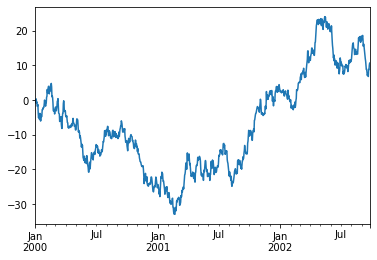

In [135]:
ts.plot()

In [136]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [137]:
df = df.cumsum()

In [139]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

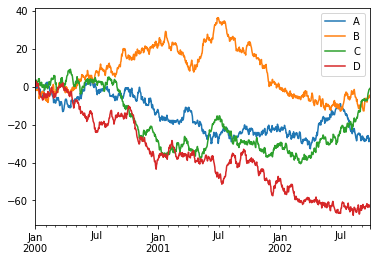

In [140]:
df.plot()

No handles with labels found to put in legend.


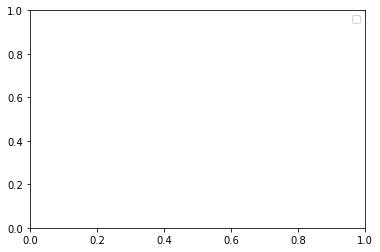

In [141]:
plt.legend(loc='best')

## CSV

In [142]:
df.to_csv('foo.csv')

In [143]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.512565,-1.457301,1.144685,0.499394
1,2000-01-02,-0.219840,-1.117312,2.730055,1.545154
2,2000-01-03,0.231121,-1.767823,3.591285,1.407083
3,2000-01-04,-1.997731,-1.591465,2.794293,2.878978
4,2000-01-05,-1.662240,-1.834452,2.230010,0.164941
...,...,...,...,...,...
995,2002-09-22,-27.409814,-5.334658,-2.583287,-62.190851
996,2002-09-23,-28.999221,-5.870533,-1.553779,-62.312509
997,2002-09-24,-27.212526,-4.683571,-1.261674,-63.234018
998,2002-09-25,-28.345544,-5.374395,-1.239505,-63.426636


## HDF5

In [144]:
df.to_hdf('foo.h5', 'df')

In [145]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-1.512565,-1.457301,1.144685,0.499394
2000-01-02,-0.219840,-1.117312,2.730055,1.545154
2000-01-03,0.231121,-1.767823,3.591285,1.407083
2000-01-04,-1.997731,-1.591465,2.794293,2.878978
2000-01-05,-1.662240,-1.834452,2.230010,0.164941
...,...,...,...,...
2002-09-22,-27.409814,-5.334658,-2.583287,-62.190851
2002-09-23,-28.999221,-5.870533,-1.553779,-62.312509
2002-09-24,-27.212526,-4.683571,-1.261674,-63.234018
2002-09-25,-28.345544,-5.374395,-1.239505,-63.426636


## Excel

In [146]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [147]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.512565,-1.457301,1.144685,0.499394
1,2000-01-02,-0.219840,-1.117312,2.730055,1.545154
2,2000-01-03,0.231121,-1.767823,3.591285,1.407083
3,2000-01-04,-1.997731,-1.591465,2.794293,2.878978
4,2000-01-05,-1.662240,-1.834452,2.230010,0.164941
...,...,...,...,...,...
995,2002-09-22,-27.409814,-5.334658,-2.583287,-62.190851
996,2002-09-23,-28.999221,-5.870533,-1.553779,-62.312509
997,2002-09-24,-27.212526,-4.683571,-1.261674,-63.234018
998,2002-09-25,-28.345544,-5.374395,-1.239505,-63.426636


## Gotchas

In [148]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().